# COVID-19 Image Classifier Using CNN
This notebook uses a Convolutional Neural Network to classify chest X-ray images into Covid, Normal, or Viral Pneumonia.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_path = r"D:\Development\Programming\AI\Route\Practices\covid19-cnn-classifier\Covid19-dataset\train"
test_path = r"D:\Development\Programming\AI\Route\Practices\covid19-cnn-classifier\Covid19-dataset\test" 

In [5]:
# Image preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [6]:
# CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

d:\Installation\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

d:\Installation\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.3681 - loss: 1.5543 - val_accuracy: 0.7727 - val_loss: 0.8762
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6666 - loss: 0.8020 - val_accuracy: 0.6364 - val_loss: 0.5614
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.7735 - loss: 0.5147 - val_accuracy: 0.8485 - val_loss: 0.3969
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.7796 - loss: 0.5050 - val_accuracy: 0.8485 - val_loss: 0.3594
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8853 - loss: 0.3116 - val_accuracy: 0.8939 - val_loss: 0.3321
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.8832 - loss: 0.2590 - val_accuracy: 0.7273 - val_loss: 0.5851
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.8966 - loss: 0.2566 - val_accuracy: 0.8333 - val_loss: 0.3613
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9171 - loss: 0.2641 - val_accuracy: 0.9242 - val_loss: 0.2334
Epoch 9/

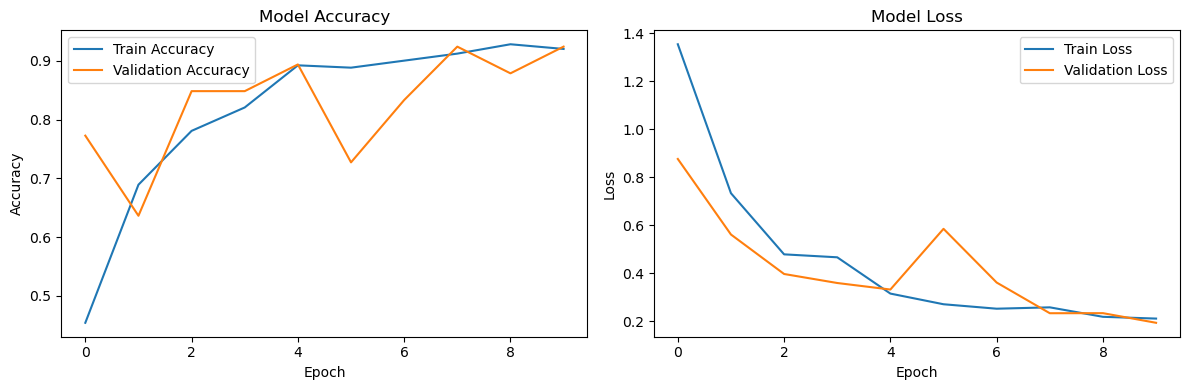

In [9]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


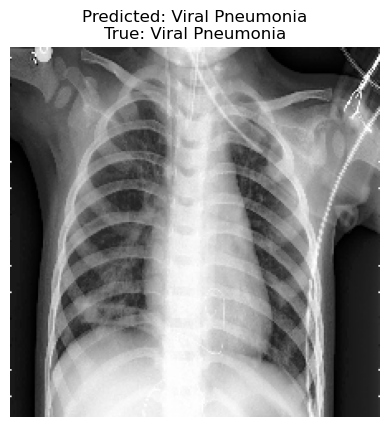

In [10]:
# Make predictions on test images
x, y = next(test_generator)
pred = model.predict(x)
predicted_class = np.argmax(pred[0])
true_class = np.argmax(y[0])

plt.imshow(x[0])
plt.axis('off')
plt.title(f"Predicted: {list(test_generator.class_indices.keys())[predicted_class]}\nTrue: {list(test_generator.class_indices.keys())[true_class]}")
plt.show()